# Carga de las librerías y la Base de Datos a estudiar.

In [25]:
#Importamos las librerías
import mglearn
import math
import matplotlib as mpl
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import pandas as pd
from scipy import stats
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing

In [2]:
#Cargamos la base de datos
data = pd.read_csv('Occupancy_Estimation.csv')
data.select_dtypes(include=['number','category','object'])

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0


# Presentación de los datos

Para esta práctica usaremos la base de datos "Room Occupancy Estimation" que se puede descargar en https://archive.ics.uci.edu/dataset/864/room+occupancy+estimation

y originalmente se utilizó en el siguiente estudio:

https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8644432&tag=1

El objetivo era intentar adivinar la ocupación de una sala gracias a varias mediciones tomadas en la misma.
Para este experimento se utilizaron cinco tipos diferentes de sensores no intrusivos: temperatura, luz, sonido, CO2 y sensor infrarrojo pasivo digital (PIR). El sensor PIR tiene dos trimpots: uno para ajustar la sensibilidad y otro para ajustar el tiempo durante el cual la salida permanece alta después de detectar movimiento. Ambos fueron ajustados a los valores más altos. Los nodos del sensor S1-S4 consistieron en sensores de temperatura, luz y sonido, S5 tenía un sensor de CO2 y S6 y S7 tenían un sensor PIR cada uno.




Veamos en profundidad cada variable:
 - Rango de valores para Date: 2017/12/22 a 2018/01/11
 - Rango de valores para Time: 00:00:28 a 23:59:58
 - Rango de valores para S1_Temp: 24.94 a 26.38
 - Rango de valores para S2_Temp: 24.75 a 29.0
 - Rango de valores para S3_Temp: 24.44 a 26.19
 - Rango de valores para S4_Temp: 24.94 a 26.56
 - Rango de valores para S1_Light: 0 a 165
 - Rango de valores para S2_Light: 0 a 258
 - Rango de valores para S3_Light: 0 a 280
 - Rango de valores para S4_Light: 0 a 74
 - Rango de valores para S1_Sound: 0.06 a 3.88
 - Rango de valores para S2_Sound: 0.04 a 3.44
 - Rango de valores para S3_Sound: 0.04 a 3.67
 - Rango de valores para S4_Sound: 0.05 a 3.4
 - Rango de valores para S5_CO2: 345 a 1270
 - Rango de valores para S5_CO2_Slope: -6.29615384615 a 8.98076923077
 - Rango de valores para S6_PIR: 0 a 1
 - Rango de valores para S7_PIR: 0 a 1
 - Rango de valores para Room_Occupancy_Count: 0 a 3
 
En los dos primeros valores vemos el rango de fechas en que se tomaron los datos y, posteriormente, el rango de medida de los sensores. Durante el estudio obviaremos la tabla de las fechas.

Se puede apreciar una gran diferencia entre las diferentes medidas tomadas. Por ejemplo, la medida de CO2 oscila entre los valores 345 y 1270, por otro lado el PIR solo los toma 0 y 1. No solo eso, sino que dentro un mismo parámetro se pueden observar diferencias, como en la medida de la luz del sensor 4, que es visiblemente menor que la de los otros sensores. Esto hará que el proceso de normalización durante el preprocesado de los datos sea algo más difícil.

In [3]:
datos = data.iloc[:, 2:]
datos

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0
10125,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0
10126,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0
10127,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0


Visualizamos la scatter matrix

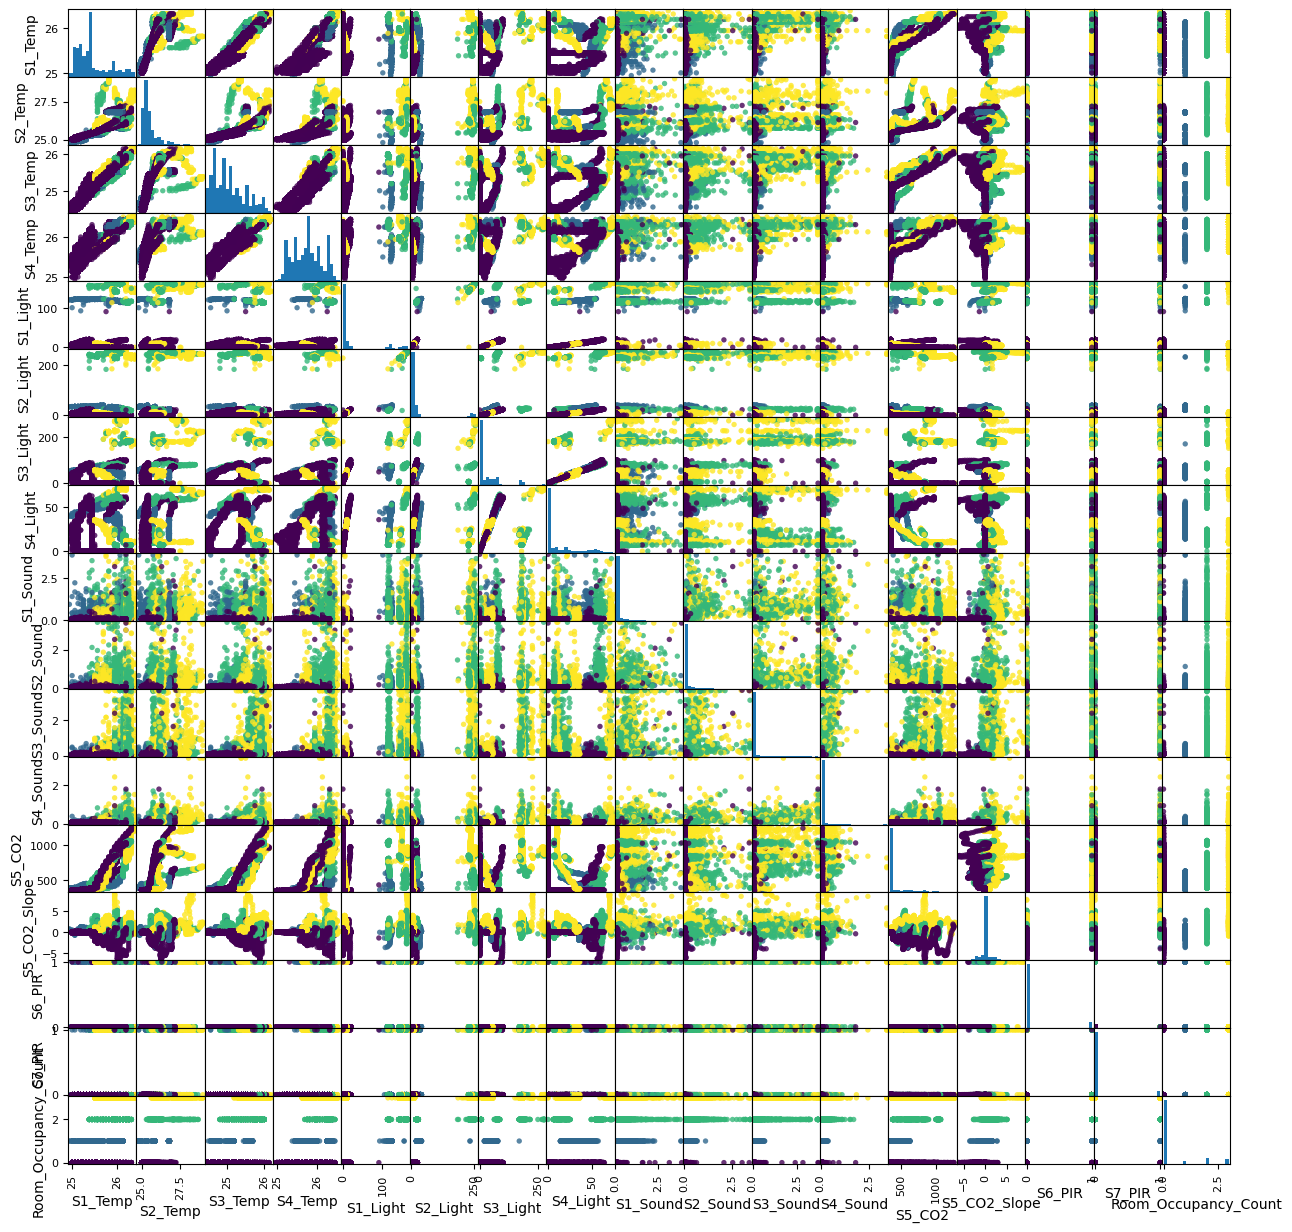

In [4]:

sp = pd.plotting.scatter_matrix(datos, c=(datos["Room_Occupancy_Count"]), figsize=(15, 15), marker='.',
                                 hist_kwds={'bins': 20}, s=60, alpha=.8)

Debido a la dificultad de la visualización por la cantidad de parámetros, haremos una scatter matriz para los sensores del 1 al 4 y otra para los 5, 6 y 7.

### Sensores del 1 al 4

In [5]:

datos_sensores14 = (datos.iloc[:,:12])
datos_sensores14 = pd.concat([datos_sensores14, datos.iloc[:, -1]],axis=1)
datos_sensores14

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,Room_Occupancy_Count
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,1
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,1
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,1
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,1
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,0
10125,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,0
10126,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,0
10127,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,0


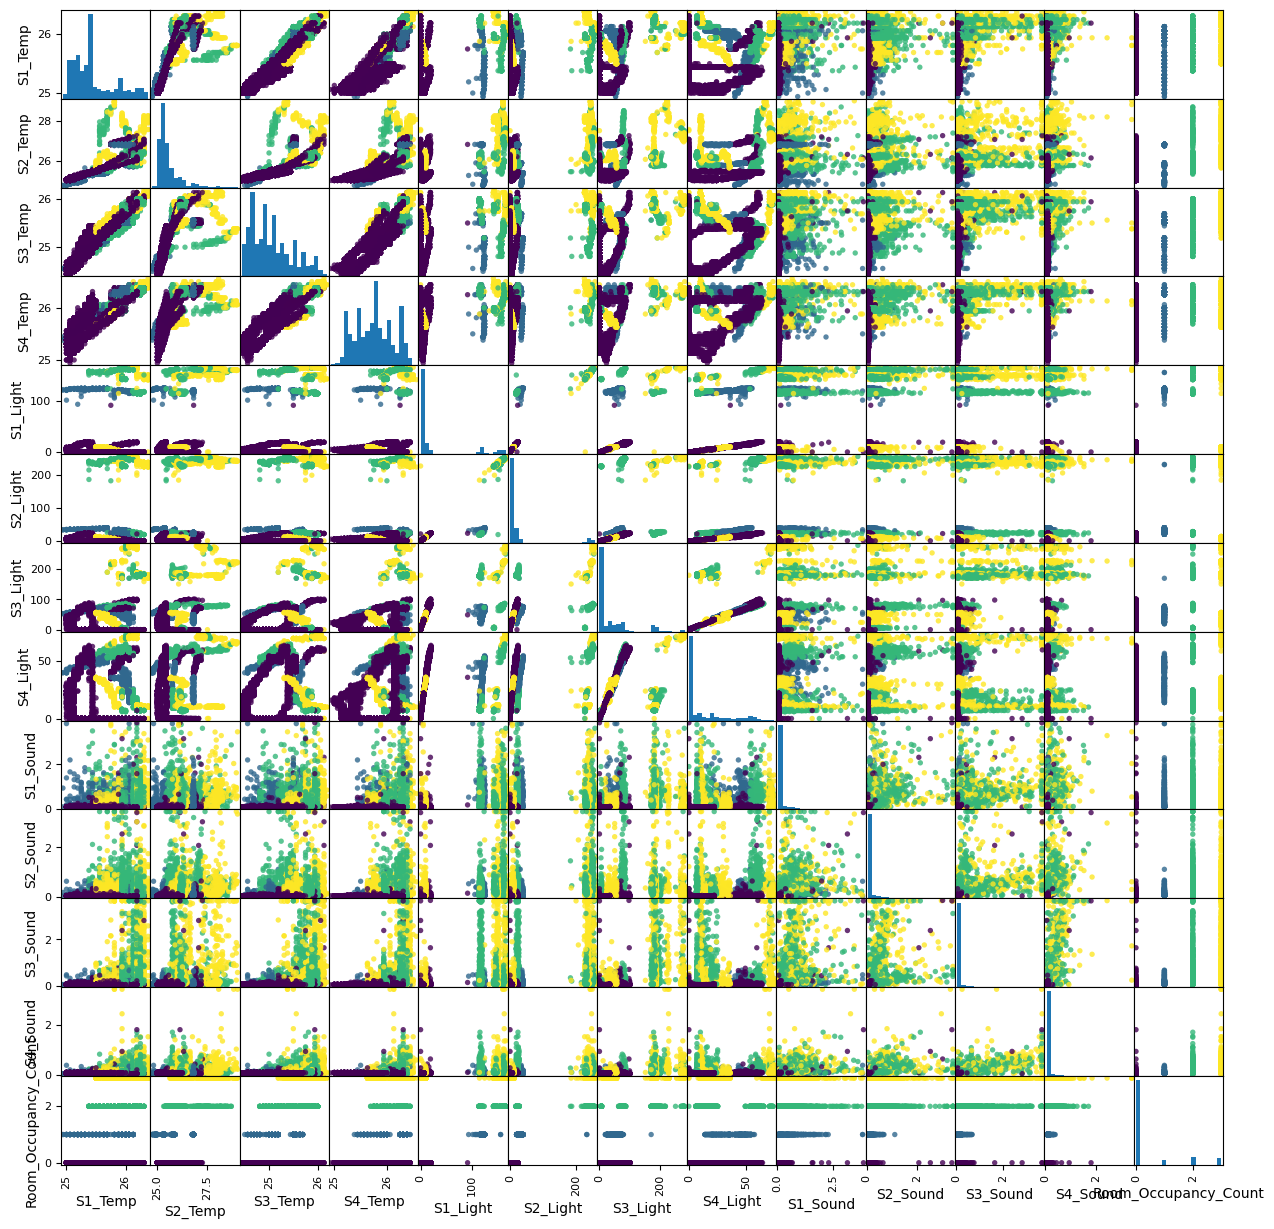

In [6]:
sp = pd.plotting.scatter_matrix(datos_sensores14, c=(datos_sensores14["Room_Occupancy_Count"]), figsize=(15, 15), marker='.',
                                 hist_kwds={'bins': 20}, s=60, alpha=.8)

Se observa que la luz del sensor 1 distingue muy bien la separación entre el número de personas ya que, en la scatter matrix, su función cruzada con la ocupación de la habitación tiene forma escalonada ascendente, aunque no termina de distinguir bien la diferencia entre 2 y 3 ocupantes. También se observa que el medidor de luz del sensor 2 recibe valores extremos.

El sensor 3 de temperatura diferencia bien cuando hay 3 ocupantes, lo cual debido a la poca cantidad de muestras para ese parámetro será de utlidad.

Además, la distribución geométrica que adopta el valor de clasificación objetivo cuando hay 0 ocupantes en los sensores lumínicos S2 y S3 no es linealmente separable, así que necesitaremos una capa con más de 2 neuronas. Y por la forma de la curva probablemente será necesario usar como función de activación la sigmoide. 

In [7]:
datos_sensores567 = (datos.iloc[:,13:])

datos_sensores567

,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,0.769231,0,0,1
1,0.646154,0,0,1
2,0.519231,0,0,1
3,0.388462,0,0,1
4,0.253846,0,0,1
...,...,...,...,...
10124,0.000000,0,0,0
10125,0.000000,0,0,0
10126,0.000000,0,0,0
10127,0.000000,0,0,0


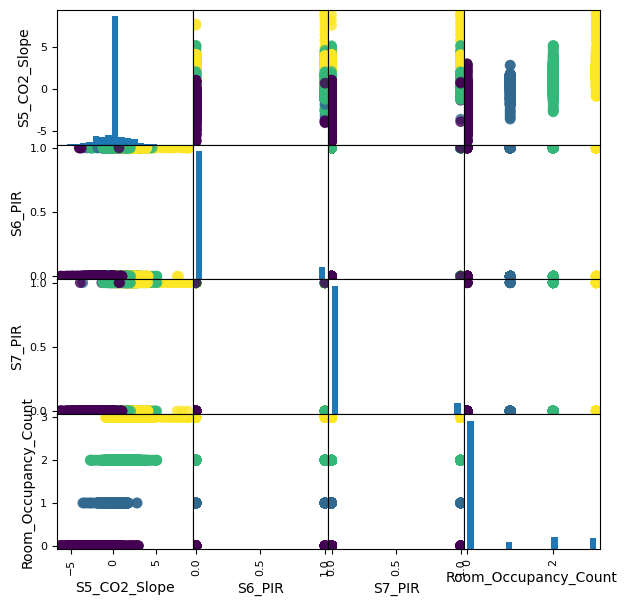

In [91]:
sp = pd.plotting.scatter_matrix(datos_sensores567, c=(datos_sensores567["Room_Occupancy_Count"]), figsize=(7, 7), marker='o',
                                 hist_kwds={'bins': 20}, s=60, alpha=.8)

Se puede observar también que la mayoría de las mediciones fueron tomadas cuando no había nadie en la sala. Por tanto esto podría afectar a las distribuciones que siguen las mediciones.

Veámoslo también usando boxplots. Previamente, separaremos los datos por tipo de medición para una mejor visualización.

In [9]:
#Separamos los datos
datos_temperatura = datos.iloc[:,:4]
datos_luz = datos.iloc[:,4:8]
datos_sonido = datos.iloc[:,8:12]
datos_Co2 = datos.iloc[:,12:13]
datos_Co2Slope = datos.iloc[:,13:14]
datos_PIR = datos.iloc[:,14:16]
datos_prenormalizados = [datos_temperatura,datos_luz,datos_sonido,datos_Co2,datos_Co2Slope,datos_PIR]


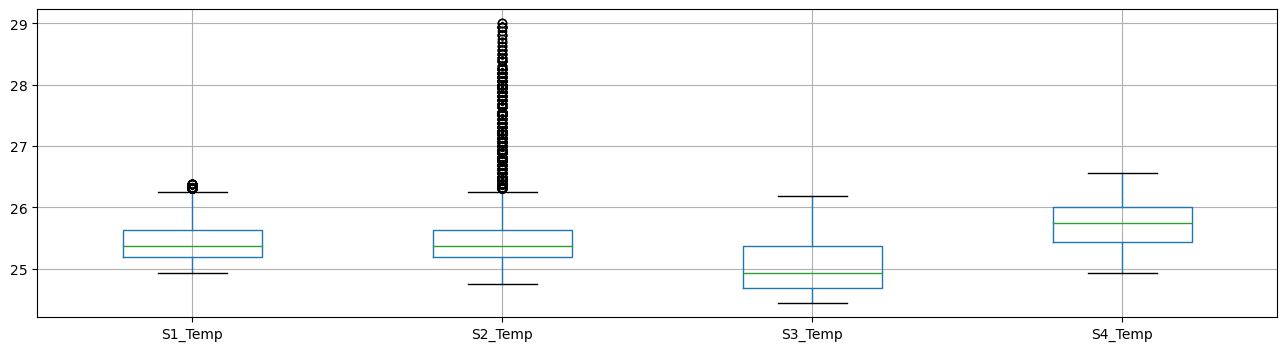

In [10]:
mpl.rcParams['figure.figsize'] = (16,4)
datos_temperatura.boxplot();

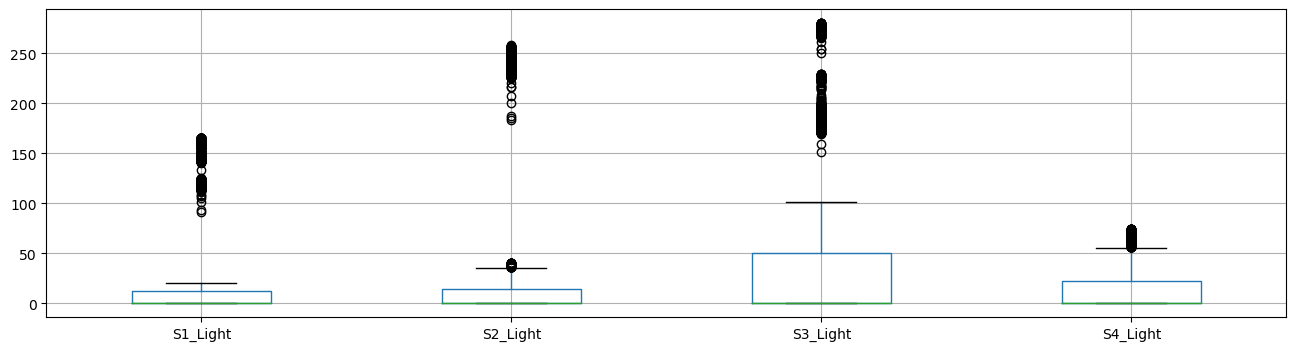

In [11]:
mpl.rcParams['figure.figsize'] = (16,4)
datos_luz.boxplot();

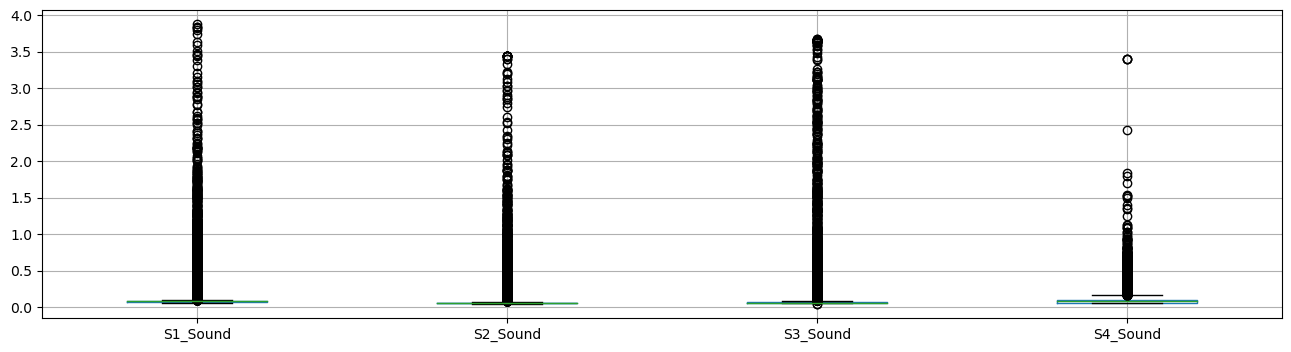

In [12]:
mpl.rcParams['figure.figsize'] = (16,4)
datos_sonido.boxplot();

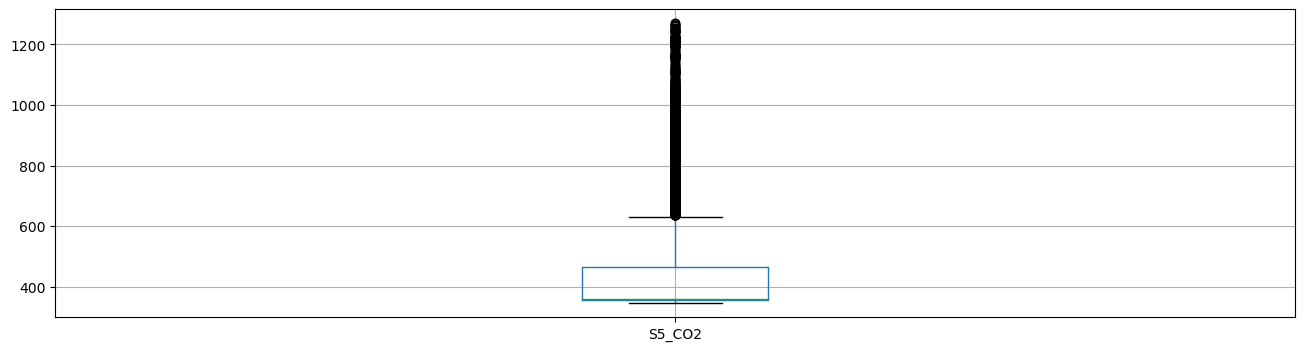

In [13]:
mpl.rcParams['figure.figsize'] = (16,4)
datos_Co2.boxplot();

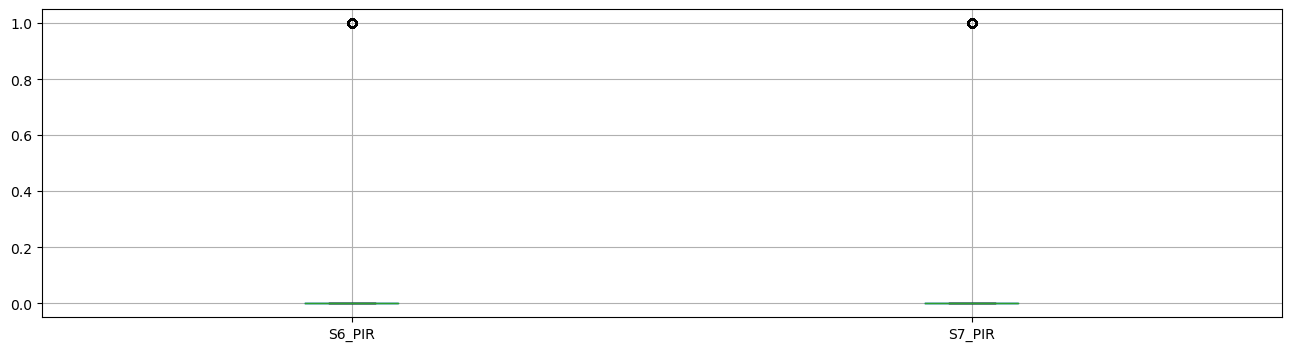

In [14]:
mpl.rcParams['figure.figsize'] = (16,4)
datos_PIR.boxplot();

Gracias a la presentación mediante boxplot se puede apreciar mejor la gran diferencia en el reparto de los datos tomados, ya que, al ser la mayoría procedentes de la medición cuando la sala estaba vacía, todos los valores que puedan variar debido a la presencia de una persona serán tomados como outliers.

Debido a esto, no eliminaremos los outliers ya que habrá mediciones que serán ruido para nuestra red, y será muy difícil separarlos de las muestras válidas.

# Entrenamiento de la red

Como vimos anteriormente el rango posible de valores cambia entre cada tipo de dato, así que seguiremos con la separación y normalizaremos cada tipo de dato por separado

In [61]:
datos_normalizados = []

for tabla in datos_prenormalizados:
    # Normalizamos y convertimos el resultado a un DataFrame, manteniendo los nombres de las columnas
    tabla_normalizada = pd.DataFrame(preprocessing.normalize(tabla), columns=tabla.columns)
    datos_normalizados.append(tabla_normalizada)

# Concatenamos todos los DataFrames normalizados a lo largo del eje de las columnas
X_datos_normalizados = pd.concat(datos_normalizados, axis=1)
X_datos_normalizados

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR
0,0.500615,0.496801,0.492987,0.509447,0.851227,0.239188,0.372851,0.281397,0.358849,0.852266,0.269137,0.269137,1.0,1.0,0.0,0.0
1,0.500308,0.496496,0.492685,0.510338,0.852641,0.232539,0.373471,0.281865,0.994439,0.053464,0.064157,0.064157,1.0,1.0,0.0,0.0
2,0.501506,0.496491,0.491476,0.510333,0.851227,0.239188,0.372851,0.281397,0.945112,0.241773,0.175835,0.131876,1.0,1.0,0.0,0.0
3,0.501209,0.496197,0.492388,0.510031,0.851227,0.239188,0.372851,0.281397,0.925623,0.225762,0.225762,0.203186,1.0,1.0,0.0,0.0
4,0.501209,0.496197,0.492388,0.510031,0.848982,0.238557,0.378884,0.280655,0.866025,0.288675,0.288675,0.288675,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,0.500229,0.501627,0.492844,0.505220,0.147353,0.171912,0.810442,0.540294,0.641223,0.284988,0.427482,0.569976,1.0,0.0,0.0,0.0
10125,0.500883,0.500883,0.493488,0.504681,0.144463,0.168540,0.818624,0.529698,0.548282,0.391630,0.391630,0.626608,1.0,0.0,0.0,0.0
10126,0.501930,0.500532,0.493142,0.504327,0.144463,0.168540,0.818624,0.529698,0.701334,0.318788,0.382546,0.510061,1.0,0.0,0.0,0.0
10127,0.501930,0.500532,0.493142,0.504327,0.144463,0.168540,0.818624,0.529698,0.468165,0.468165,0.585206,0.468165,1.0,0.0,0.0,0.0


In [63]:
X_datos,y_datos= X_datos_normalizados.iloc[:,:],datos.iloc[:,-1]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_datos, y_datos, 
                                                    random_state=42,test_size=0.20)

Hagamos una primera prueba con los valores predeterminados de SciKit-Learn.

In [96]:
mlp = MLPClassifier(solver='lbfgs', random_state=0,max_iter=10000)
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=10000, random_state=0, solver='lbfgs')

In [97]:
print("Rendimiento en el conjunto de entrenamiento: ",mlp.score(X_train,y_train))
print("Rendimiento en el conjunto de prueba: ",mlp.score(X_test,y_test))
print("Rendimiento en el conjunto total: ",mlp.score(X_datos,y_datos))

Rendimiento en el conjunto de entrenamiento:  0.9998765889176848
Rendimiento en el conjunto de prueba:  0.9881539980256664
Rendimiento en el conjunto total:  0.9975318392733735


Aunque tiene un buen rendimiento podemos intentar mejorarlo ya que conocemos la estructura de los datos.

Debido a que tenemos cuatro tipos distintos de sensores, los cuatro primeros de ellos múltiples, el sensor de CO2, el medidor de crecimiento de CO2 y los medidores PIR. Por ello pondremos cuatro neuronas en la primera capa.
Por otro lado, como la posible ocupación de la sala toma cuatro posibles valores pondremos también 4 neuronas en la capa final, ya que la función final de activación que usa Scikit-Learn es la softmax y esto nos dirá cuál es el número de personas más probable en la sala.

In [86]:
mlp = MLPClassifier(solver='lbfgs', random_state=0,max_iter=10000,hidden_layer_sizes=(4,4))
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(4, 4), max_iter=10000, random_state=0,
              solver='lbfgs')

In [87]:
print("Rendimiento en el conjunto de entrenamiento: ",mlp.score(X_train,y_train))
print("Rendimiento en el conjunto de prueba: ",mlp.score(X_test,y_test))
print("Rendimiento en el conjunto total: ",mlp.score(X_datos,y_datos))

Rendimiento en el conjunto de entrenamiento:  0.9925953350610884
Rendimiento en el conjunto de prueba:  0.9901283316880553
Rendimiento en el conjunto total:  0.9921018856747952


Gracias a los cambios se puede observar un pequeño deterioro en el rendimiento con el conjunto de entrenamiento, pero un aumento en el conjunto de prueba.

Realizaremos otro intento colocando una neurona en la capa de entrada por cada parámetro a estudiar y usaremos la función sigmoide, como dijimos durante el estudio previo, para la función de activación para ver si mejora o no la red.

In [92]:
mlp = MLPClassifier(solver='lbfgs', random_state=0,max_iter=10000,hidden_layer_sizes=(16,4),activation="logistic")
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(16, 4), max_iter=10000,
              random_state=0, solver='lbfgs')

In [93]:
print("Rendimiento en el conjunto de entrenamiento: ",mlp.score(X_train,y_train))
print("Rendimiento en el conjunto de prueba: ",mlp.score(X_test,y_test))
print("Rendimiento en el conjunto total: ",mlp.score(X_datos,y_datos))

Rendimiento en el conjunto de entrenamiento:  0.9980254226829569
Rendimiento en el conjunto de prueba:  0.991609081934847
Rendimiento en el conjunto total:  0.996742027840853


Gracias a esto hemos conseguido una mejora leve, probablemente debido al uso de la función sigmoide. Comprobémoslo volviendo a la construción con 4 neuronas por capa pero con la función sigmoide.

In [98]:
mlp = MLPClassifier(solver='lbfgs', random_state=0,max_iter=10000,hidden_layer_sizes=(4,4),activation="logistic")
mlp.fit(X_train, y_train)
print("Rendimiento en el conjunto de entrenamiento: ",mlp.score(X_train,y_train))
print("Rendimiento en el conjunto de prueba: ",mlp.score(X_test,y_test))
print("Rendimiento en el conjunto total: ",mlp.score(X_datos,y_datos))

Rendimiento en el conjunto de entrenamiento:  0.9958040232012835
Rendimiento en el conjunto de prueba:  0.9950641658440277
Rendimiento en el conjunto total:  0.9956560371211374


Efectivamente el rendimiento en el conjunto total ha empeorado levemente, pero ha aumentado en el conjunto test.

Intentemos ver los pesos de nuestra última red para comprobar si nos dice algo de las decisiones tomadas.

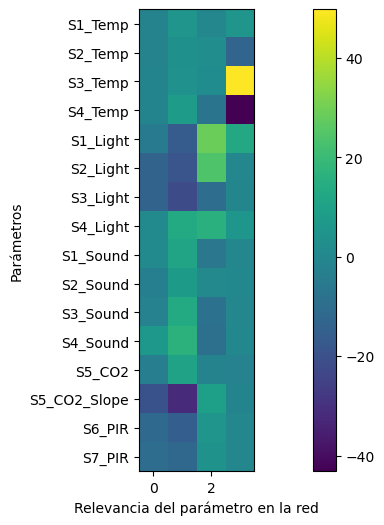

In [99]:
plt.figure(figsize=(15, 6))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(16),nombres_columnas[:-1])
plt.xlabel("Relevancia del parámetro en la red")
plt.ylabel("Parámetros")
plt.colorbar()
plt.show()

Como vimos durante el estudio previo el sensor de temperatura 3 ha sido útil, por otro lado, parece ser que la red nos dice que la temperatura medida por el sensor 4 no es buena para discernir cuándo hay 3 personas en la sala.